# Overall Question is What factors contributed to the decline in popularity of rock music during the 2000s

## This will be broken down into 3 questions 

### Question 1: Did the rise of other genres impact rock music's presence on the charts?

### Question 2: How much did the changes in the medium of music consumption affect rock music artists and sales (CDs to streaming platforms)?

### Question 3: Did the rise of solo artists in various genres impact the popularity and presence of traditional rock bands?

# Question 1

## Did the rise of other genres impact rock music's presence on the charts?

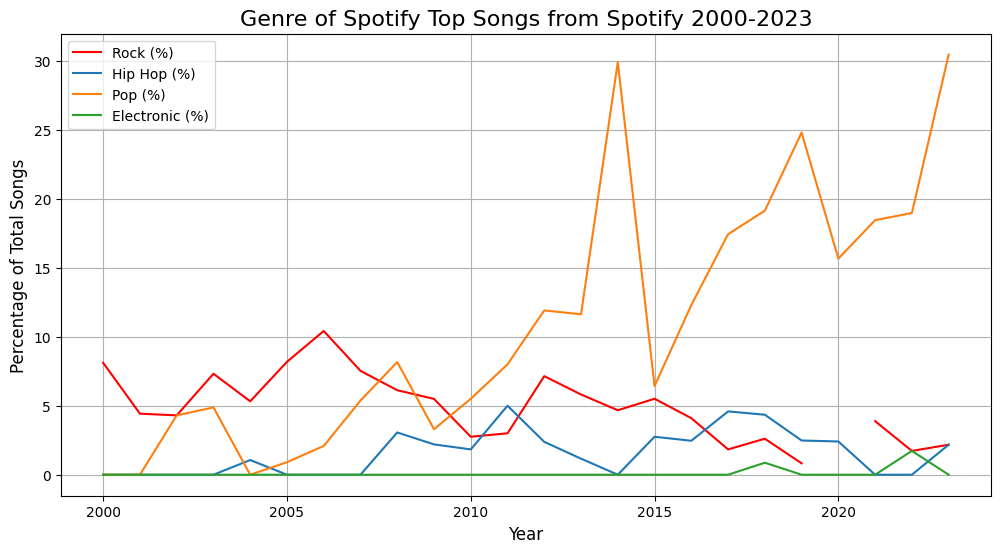

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the dataset
file_path = '../Data/BestSongsonSpotifyfrom2000-2023.csv'  
spotify_data = pd.read_csv(file_path, delimiter=';')

# The below is being done in case any of the genres have wrong uppercase or lowercase
# Standardize genre labels (lowercase, strip whitespace for consistency)
spotify_data['top genre'] = spotify_data['top genre'].str.lower().str.strip()

# Setting a filter for rock
rock_genres = ['rock', 'indie rock', 'alternative rock', 'modern rock']  # Add other rock-related genres as needed
spotify_data['is_rock'] = spotify_data['top genre'].apply(lambda x: any(rock in x for rock in rock_genres))

# Filter rock data
rock_data = spotify_data[spotify_data['is_rock']]

#Filter based on year to get rid of 1980 - 1990
spotify_data = spotify_data[spotify_data['year'] >= 2000]
rock_data = rock_data[rock_data['year'] >= 2000]

# Getting data from each year

# Count number of rock songs per year
rock_trend = rock_data.groupby('year').size()

# Count songs by genre per year
genre_trend = spotify_data.groupby(['year', 'top genre']).size().unstack(fill_value=0)

# Calculate the total number of songs per year for comparison
total_songs_per_year = spotify_data.groupby('year').size()

rock_percentage = (rock_trend / total_songs_per_year) * 100

plt.figure(figsize=(12, 6))

# Plot rock trend
plt.plot(rock_percentage.index, rock_percentage.values, label='Rock (%)', color='red')

# Plot other top genres for comparison
for genre in ['hip hop', 'pop', 'electronic']:  # Add other genres of interest
    genre_trend_percentage = (genre_trend[genre] / total_songs_per_year) * 100
    plt.plot(genre_trend_percentage.index, genre_trend_percentage.values, label=f'{genre.title()} (%)')

# Add titles and labels
plt.title('Genre of Spotify Top Songs from Spotify 2000-2023', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage of Total Songs', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Question 2 

## How much did the changes in the medium of music consumption affect rock music artists and sales (CDs to streaming platforms)?

<Figure size 1200x600 with 0 Axes>

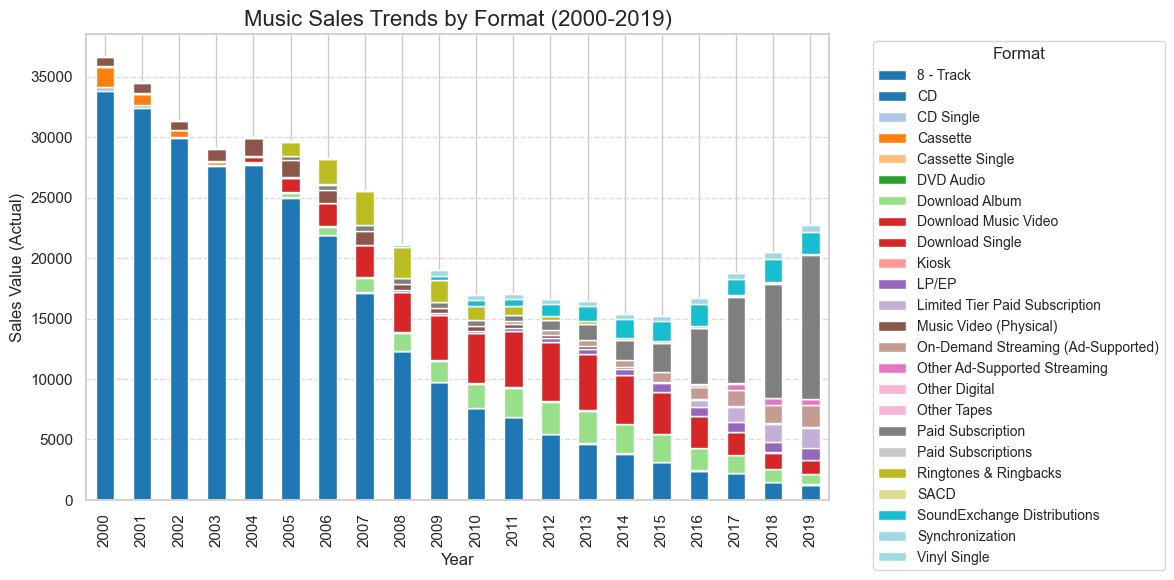

In [126]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
music_sales = pd.read_csv('../Data/MusicDataSales.csv')

# Aggregate by Year and Format (no categories, keep individual formats)
sales_by_format = music_sales.groupby(['Year', 'Format'])['Value (Actual)'].sum().reset_index()

# Filter the dataset for years 2000 to 2019
sales_by_format_2000_2023 = sales_by_format[(sales_by_format['Year'] >= 2000) & (sales_by_format['Year'] <= 2023)]

# Pivot for stacked bar plotting
sales_pivot_2000_2023 = sales_by_format_2000_2023.pivot(index='Year', columns='Format', values='Value (Actual)').fillna(0)

# Plotting stacked bar chart
plt.figure(figsize=(12, 6))

# Plot the stacked bar chart
sales_pivot_2000_2023.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

# Customize the plot
plt.title('Music Sales Trends by Format (2000-2019)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales Value (Actual)', fontsize=12)
plt.legend(title='Format', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

# Predict the format distrubution of the sales for the year 2023 based on the data above 

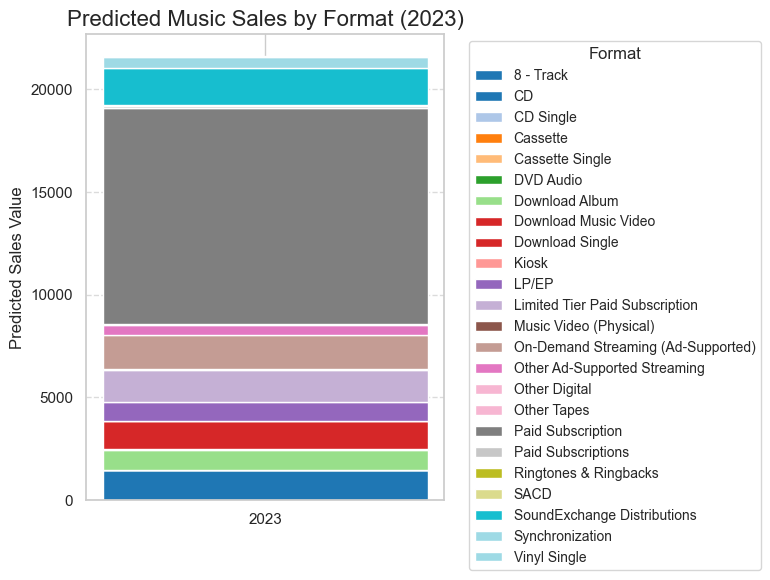

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor # Random forrest was used because logisitc regression was not producting accurate results

# The goal will be to create a singular bar of the graph above to represent what the 2023 bar might look like 

# Load the dataset
music_sales = pd.read_csv('../Data/MusicDataSales.csv')

# Aggregate by Year and Format
sales_by_format = music_sales.groupby(['Year', 'Format'])['Value (Actual)'].sum().reset_index()

# Pivot for easier modeling
sales_pivot = sales_by_format.pivot(index='Year', columns='Format', values='Value (Actual)').fillna(0)

# Prepare the features (Year) and target (sales distribution)
X = sales_pivot.index.values.reshape(-1, 1)  # Year
y = sales_pivot.values  # Sales values for each format

# Train a RandomForest model for each format
# Random forrest was used because logisitic regression was not outputting an expected result
# An Arbitrary number of trees are used 1000 
model = RandomForestRegressor(n_estimators=1000, random_state=24)  
model.fit(X, y)

# Predict for 2023
future_year = np.array([2023]).reshape(-1, 1)
predictions_2023 = model.predict(future_year)

# Create DataFrame for the 2023 predictions
predicted_sales_2023 = pd.DataFrame(predictions_2023, columns=sales_pivot.columns)

# Create the stacked bar plot
plt.figure(figsize=(8, 6))

# Plot single stacked bar
bottom = 0
colors = plt.cm.tab20(np.linspace(0, 1, len(sales_pivot.columns)))

for idx, format_name in enumerate(sales_pivot.columns):
    value = predicted_sales_2023[format_name].iloc[0]
    plt.bar('2023', value, bottom=bottom, label=format_name, color=colors[idx])
    bottom += value

# Customize the plot
plt.title('Predicted Music Sales by Format (2023)', fontsize=16)
plt.ylabel('Predicted Sales Value', fontsize=12)
plt.legend(title='Format', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

# Question 3  

## Did the rise of solo artists in various genres impact the popularity and presence of traditional rock bands?

   Rank                 Title                         Artist    Type  Year
0     1  "We Belong Together"                   Mariah Carey  Singer  2005
1     2      "Hollaback Girl"                   Gwen Stefani  Singer  2005
2     3     "Let Me Love You"                          Mario  Singer  2005
3     4   "Since U Been Gone"                 Kelly Clarkson  Singer  2005
4     5           "1, 2 Step"  Ciara featuring Missy Elliott  Singer  2005


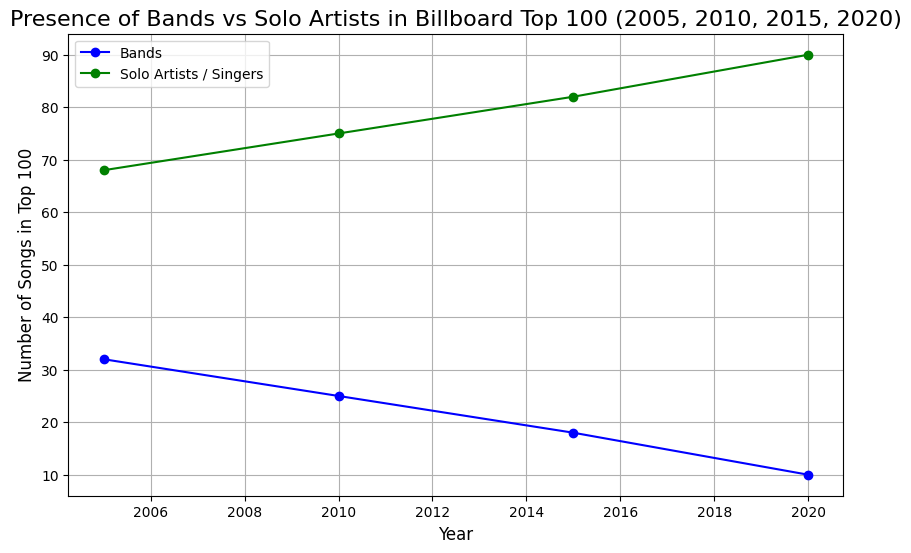

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Billboard Top 100 dataset
billboard_data = pd.read_csv('../Data/BillboardTop100BandsVsSingers.csv', encoding='ISO-8859-1')

print(billboard_data.head())

# Group by Year and Type (Band vs Singer) and count the occurrences
band_vs_singer = billboard_data.groupby(['Year', 'Type']).size().unstack(fill_value=0)


# Plot the trends of Bands vs Solo Artists
plt.figure(figsize=(10, 6))

# Plot Bands
plt.plot(band_vs_singer.index, band_vs_singer['Band'], label='Bands', marker='o', color='blue')

# Plot Solo Artists
plt.plot(band_vs_singer.index, band_vs_singer['Singer'], label='Solo Artists / Singers', marker='o', color='green')

# Add title and labels
plt.title('Presence of Bands vs Solo Artists in Billboard Top 100 (2005, 2010, 2015, 2020)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Songs in Top 100', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


# Presence of bands vs singers in the top 25 throughout the years 2005 - 2020

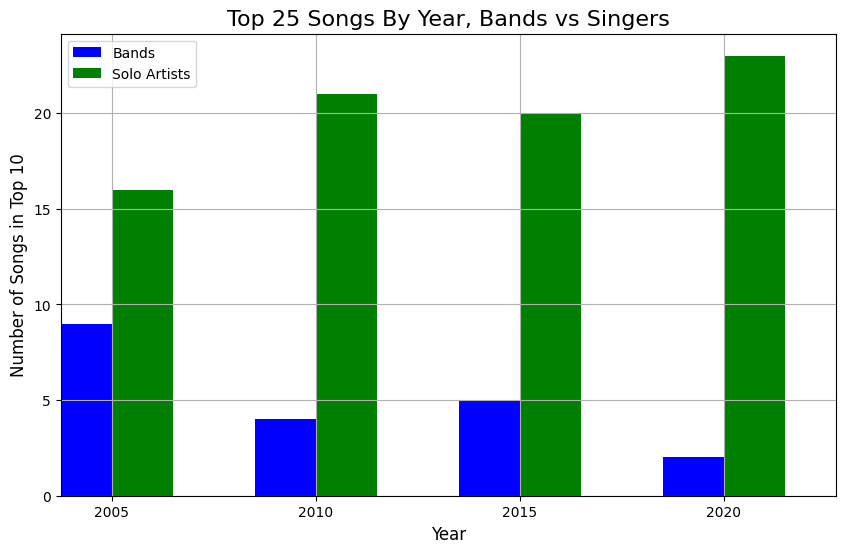

In [ ]:
import matplotlib.pyplot as plt

# Filter the data to include only the top 10 songs for each year
top_10_data = billboard_data[billboard_data['Rank'] <= 25]


# Group by Year and Type (Band vs Singer) and count the occurrences for the Top 10 songs
top_10_band_vs_singer = top_10_data.groupby(['Year', 'Type']).size().unstack(fill_value=0)

# Plot the trends of Bands vs Solo Artists in the Top 10
plt.figure(figsize=(10, 6))

# Plot Bands
top_10_band_vs_singer['Band'].plot(kind='bar', label='Bands', color='blue', width=0.3, position=1)

# Plot Solo Artists
top_10_band_vs_singer['Singer'].plot(kind='bar', label='Solo Artists', color='green', width=0.3, position=0)

# Add title and labels
plt.title('Top 25 Songs By Year, Bands vs Singers', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Songs in Top 10', fontsize=12)
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal
plt.legend()
plt.grid(True)
plt.show()

# Predict what rank a song by a band might be in the year 2023

In [144]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('../Data/BillboardTop100BandsVsSingers.csv', encoding='ISO-8859-1')

# Encode categorical columns (Artist, Type) using LabelEncoder
label_encoder = LabelEncoder()

# Encoding 'Artist' and 'Type' columns to numerical values
data['Artist'] = label_encoder.fit_transform(data['Artist'])
data['Type'] = label_encoder.fit_transform(data['Type'])

# Features (X) - Using Year, Artist, and Type
X = data[['Year', 'Artist', 'Type']]

# Target variable (y) - Rank
y = data['Rank']

# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Sample data for prediction
#we are not focusing on specific bands
pred_song = pd.DataFrame({
    'Year': [2020],
    'Artist': [0],  # arbitrary label because we are looking for any band 
    'Type': [label_encoder.transform(['Band'])[0]]  # 'Band' is transformed to the corresponding label
})

# Predict the rank for the song in 2023
predicted_rank = model.predict(pred_song)

print(f"Predicted rank for a song by a band in 2023: {predicted_rank[0]}")


Predicted rank for a song by a band in 2023: 55.55818522817816


# Social Media usage this can be used to compare to previous graphs, specifically the slight rise in youtube and instagram  


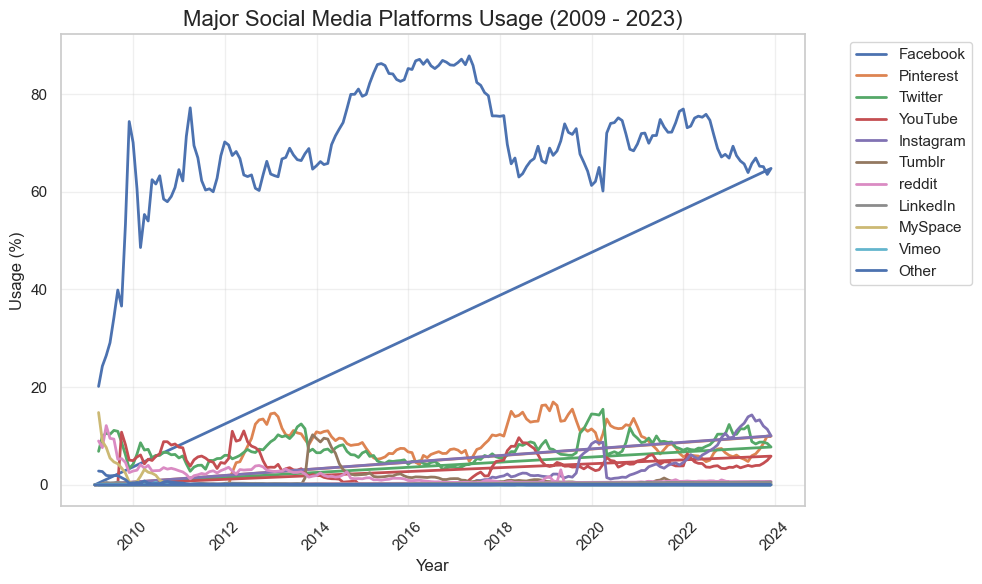

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
social_media_data = pd.read_csv('../Data/social_media.csv')

# Convert 'Date' column to datetime format
social_media_data['Date'] = pd.to_datetime(social_media_data['Date'], format='%Y-%m')

# Define platforms to exclude there's a lot of noise in this dataset I am only including the important sites 
exclude_platforms = ['StumbleUpon', 'VKontakte', 'Google+', 'Digg', 
                    'Fark', 'NowPublic', 'iWiW', 'news.ycombinator.com', 
                    'Delicious', 'orkut', 'Odnoklassniki']

# Create a list of platforms to keep (all columns except 'Date' and excluded platforms)
platforms_to_plot = [col for col in social_media_data.columns 
                    if col not in exclude_platforms and col != 'Date']

# Plot usage of selected social media platforms over time
plt.figure(figsize=(10, 6))

# Loop through each selected platform to plot its usage
for platform in platforms_to_plot:
    # Replace NaNs with None so that they are not connected by lines
    plt.plot(social_media_data['Date'], social_media_data[platform].where(social_media_data[platform].notna()), 
             label=platform, linewidth=2)

# Add labels and title
plt.title('Major Social Media Platforms Usage (2009 - 2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Usage (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()